## Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

df.columns = df.columns.str.lower().str.replace(' ', '_')

df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## View basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Check for missing values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Create a new column: average score

In [6]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [11]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

## Countplot: Gender distribution

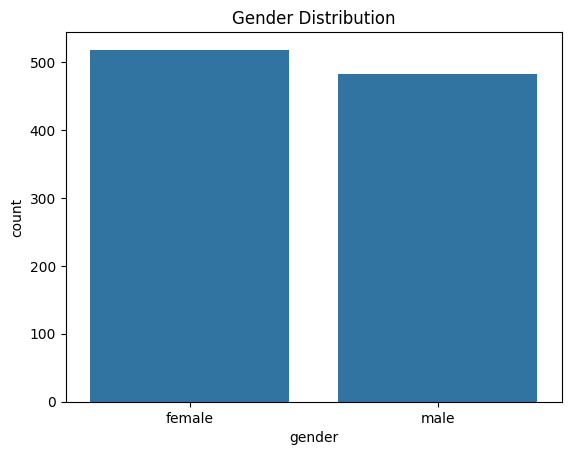

In [12]:
sns.countplot(data = df, x = "gender")
plt.title("Gender Distribution")
plt.show()

## Boxplot: Average score vs Parental level of education

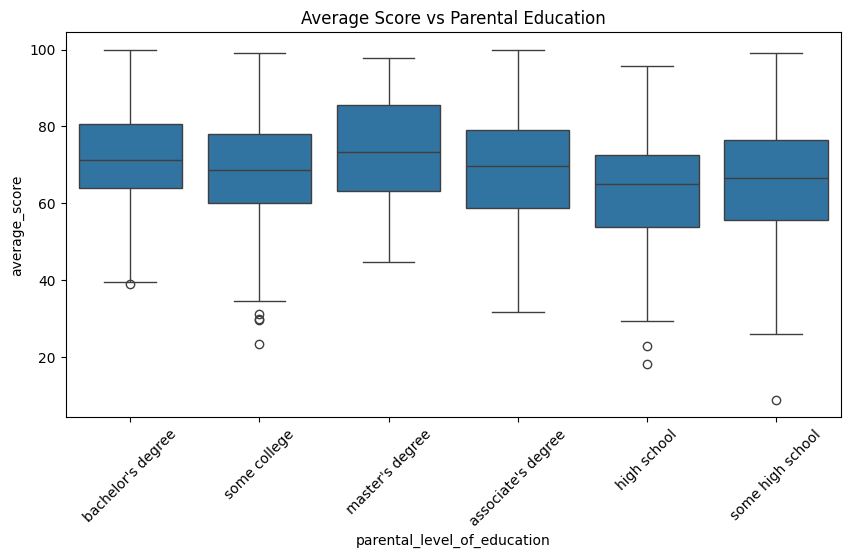

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='parental_level_of_education', y='average_score')
plt.xticks(rotation=45)
plt.title("Average Score vs Parental Education")
plt.show()

## Barplot: Test preparation impact

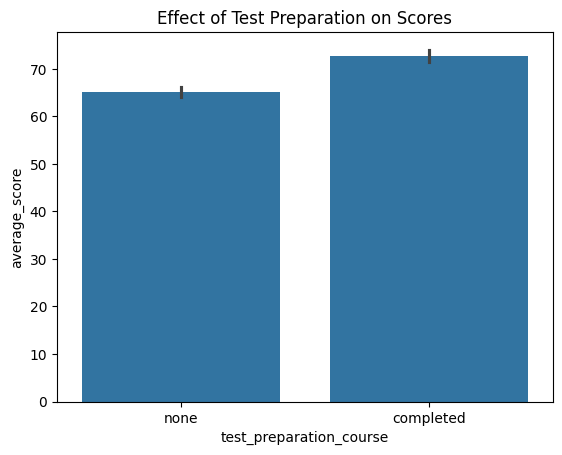

In [15]:
sns.barplot(data=df, x='test_preparation_course', y='average_score')
plt.title("Effect of Test Preparation on Scores")
plt.show()

## Correlation heatmap for numerical features

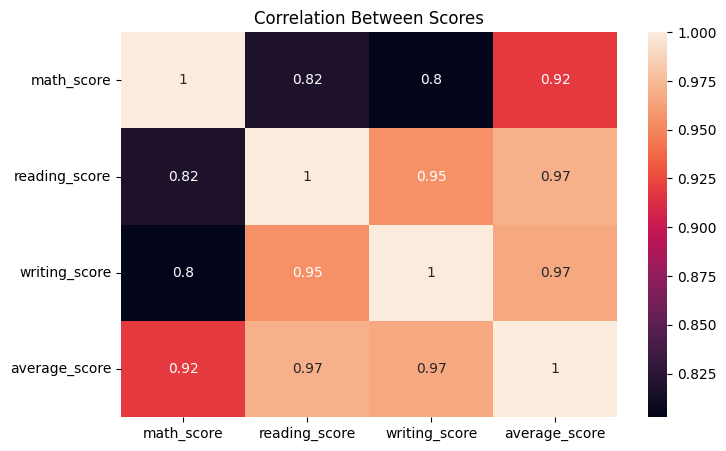

In [16]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr(), annot=True)
plt.title("Correlation Between Scores")
plt.show()

## Distribution plot: Average Score

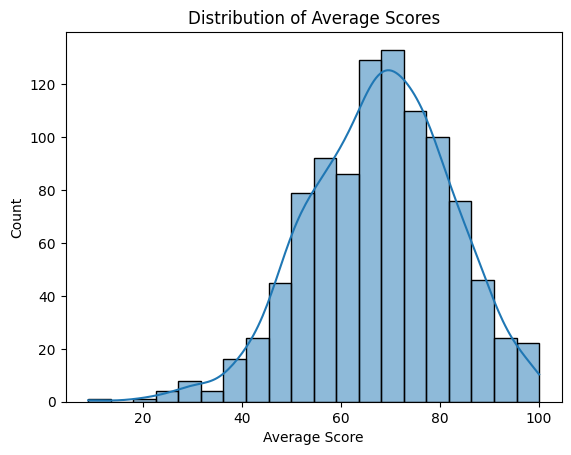

In [20]:
sns.histplot(df['average_score'], bins=20, kde=True)
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.show()